<img src = "https://drive.google.com/uc?id=1yCymrlge8a_0LflEdjil9GBaYmSoP4O0" height = 80 width = 150>

# Coursera Review

## What is Coursera?
Coursera is an online learning platform that allows you to take online education courses. These courses come with the opportunity to earn degrees from leading universities and companies.

## Is Coursera Really Worth It?
- If students recommend Coursera online learning, they leave positive comments and high rating(4-5 label).While if students are not satisfied with the Coursera online learning, they leaves negative comments and low rating(1-2 label). 

- Dataset: 100K+ Scraped Course Reviews from the Coursera Website (As of May 2017)
This dataset has students reviews of Coursera MOOC classes. What we’re going to do is develop a classification model that looks at the review text and predicts whether a review is positive or negative. Since this data 
set already includes whether a review is positive or negative in the feedback column, we can use 
those answers to train and test our model. Our goal here is to produce an accurate model that we 
could then use to process new user reviews and quickly determine whether they were positive or negative.

- In this notebook, the sentiment of reviews is binary, meaning the review rating <=2 results in a sentiment score of 0, and rating >=4 have a sentiment score of 1.

In [3]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [4]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
100467,Trendy topic with talks from expertises in the...,4
100468,"Wonderful! Simple and clear language, good ins...",5
100469,an interesting and fun course. thanks. dr quincy,5
100470,"very broad perspective, up to date information...",4


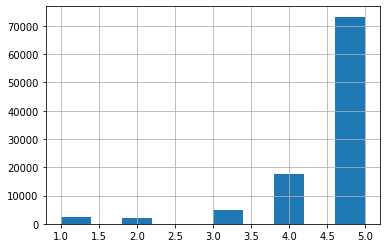

In [5]:
dataset['Label'].hist()

In [6]:
dataset['Label'].value_counts()

5    73276
4    17558
3     5016
1     2403
2     2219
Name: Label, dtype: int64

In [7]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [8]:
dataset['Label'].value_counts()

5    73276
4    17558
1     2403
2     2219
Name: Label, dtype: int64

In [9]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4    2508
1    2403
2    2219
5    2093
Name: Label, dtype: int64

In [10]:
dataset.shape

(9223, 2)

In [11]:
dataset

,Review,Label
0,This course doesn't contain any new informatio...,1
1,I do not find very interesting this course. to...,1
2,A lot of speaking without any sense. Skip it a...,1
3,It's not a course... this is a very short gene...,1
4,"First of all, I really enjoyed Professor Ittne...",1
...,...,...
9218,"It's really helpful to me . In this class, I s...",5
9219,Pretty good introduction course. Not very thor...,5
9220,Really liked this course it gave me so much to...,5
9221,Great course for a beginner.,5


In [12]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [13]:
dataset['Label'].value_counts()

0    4622
1    4601
Name: Label, dtype: int64

In [14]:
# Ready to split 'train set' and  'test set'
X = dataset['Review']
y = dataset['Label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)


In [16]:
print(type(y_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 0    2313
1    2298
Name: Label, dtype: int64
----------------------------
test set: 0    2309
1    2303
Name: Label, dtype: int64


In [18]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    The best machine learning course ever!This is ...
6753                             Very good for beginners!
7326                                    Awsome as always!
                              ...                        
2740    The value of this course is the collection of ...
9055    My best of the 4th courses on Conception Garph...
8206                                       Nicely taught.
8391    Excellent course!!! Really helped me to learn ...
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [19]:
X_test

5942    Very useful course if you translate in other l...
1456    Very bad course too fast is not an introductio...
7128    Very good course.Can be improved with more exe...
5831    Great course, although week 4 seems awfully sh...
7466    The course is very well structured and gives c...
                              ...                        
5638    Excellent course. I would prefere to have more...
3380    This instructor reads of a script! He rushes t...
3200    Basically not much content. The guest speaker ...
2075    Beware - will make you upgrade to complete qui...
3624    I do like the course, but Coursera has disable...
Name: Review, Length: 4612, dtype: object

In [20]:
# concat()함수>> df와 series에 다 적용가능
train_set = pd.concat([X_train, y_train], axis = 1)
print(train_set)

                                                 Review  Label
1519  The Lecturers are very enthusiastic, but I was...      0
2501  Beware this course, especially if you are new ...      0
8896  The best machine learning course ever!This is ...      1
6753                           Very good for beginners!      1
7326                                  Awsome as always!      1
...                                                 ...    ...
2740  The value of this course is the collection of ...      0
9055  My best of the 4th courses on Conception Garph...      1
8206                                     Nicely taught.      1
8391  Excellent course!!! Really helped me to learn ...      1
4127  By the end of the course, you do start to deve...      0

[4611 rows x 2 columns]


In [21]:
train_set.head(8)

,Review,Label
1519,"The Lecturers are very enthusiastic, but I was...",0
2501,"Beware this course, especially if you are new ...",0
8896,The best machine learning course ever!This is ...,1
6753,Very good for beginners!,1
7326,Awsome as always!,1
4991,It´ll be great if you could show us how to wri...,1
495,I think there are only few contents.,0
1724,"Excellent teaching, but it's not actually free...",0


In [22]:
train_set['Review'][7]

'The Capstone project has been getting delayed since JanDont expect yourself to complete the specialization'

In [23]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train_set['Review'][7], "html5lib")
print(train_set['Review'][:20])


example1.get_text()[:10]

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    The best machine learning course ever!This is ...
6753                             Very good for beginners!
7326                                    Awsome as always!
4991    It´ll be great if you could show us how to wri...
495                  I think there are only few contents.
1724    Excellent teaching, but it's not actually free...
4835    This is an awesome Course. I'd like that the f...
2986    Too basic. Should give an example on how these...
6853    Very insightful. Highly recommended for anyone...
1909    Instructor doesn't seem to be passionate about...
1625    Pretty bad as far as I am conerned. I spent tw...
8229                                good for the beginers
4745                          Great course, so much fun!!
531     I'm sorely disappointed. I learned almost noth...
1493    Poor quality and heavily outdated content. Vid...
5724    Case s

'The Capsto'

In [24]:
import re
letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

'The Capsto'

In [25]:
# making lower case
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()      # Q str?

In [26]:
# Tokenizing
words = lower_case.split()
print(len(words))
words[:10]

15


['the',
 'capstone',
 'project',
 'has',
 'been',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect']

In [27]:
# Download for preprocessing the text
import nltk
nltk.download('stopwords')   # from nltk.corpus import stopwords를 위한 resource
nltk.download('wordnet') # from nltk.stem import WordNetLemmatizer를 위한 resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

### Stopwords

In [29]:
# Tokens exceot for stopwords 
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

9


['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

## SnowballStemmer

`print("The stemmed form of studying is: {}".format(stemmer.stem("studying")))`  
`print("The stemmed form of studies is: {}".format(stemmer.stem("studies")))`  
`print("The stemmed form of study is: {}".format(stemmer.stem("study")))`  

>The stemmed form of studying is: studi  
>The stemmed form of studies is: studi  
>The stemmed form of study is: studi  

In [30]:
# Before stemmer
words[:30]

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [31]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

words = [stemmer.stem(w) for w in words]
# After stemmer
words[:10]

['capston',
 'project',
 'get',
 'delay',
 'sinc',
 'jandont',
 'expect',
 'complet',
 'special']

In [32]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

['capston',
 'project',
 'get',
 'delay',
 'sinc',
 'jandont',
 'expect',
 'complet',
 'special']

In [33]:
def review_to_words(raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [34]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [35]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train_set['Review'], review_to_words, workers=4)  

CPU times: user 34.7 ms, sys: 53.2 ms, total: 88 ms
Wall time: 2.66 s


In [36]:
clean_train_reviews

1519    lectur enthusiast hope exampl assign base pand...
2501    bewar cours especi new area despit cours speci...
8896    best machin learn cours ever best machin learn...
6753                                          good beginn
7326                                          awsom alway
                              ...                        
2740    valu cours collect read materi found place lec...
9055    best th cours concept garphic imposs regist la...
8206                                          nice taught
8391                 excel cours realli help learn better
4127    end cours start develop hacker mental cours wr...
Name: Review, Length: 4611, dtype: object

In [37]:
%time clean_test_reviews = apply_by_multiprocessing(\
   X_test, review_to_words, workers=4)  

CPU times: user 40.4 ms, sys: 55.2 ms, total: 95.7 ms
Wall time: 3.24 s


### Bag-of-words model - Wikipedia  
다음의 두 문장이 있다고 하자,  

(1) John likes to watch movies. Mary likes movies too.  
(2) John also likes to watch football games.  
위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.  

[
    "John",  
    "likes",  
    "to",  
    "watch",  
    "movies",  
    "Mary",    
    "too",  
    "also",  
    "football",  
    "games"  
]  
그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.  
  
(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]    
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]    
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.  
  
단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.  

[  
    "John likes",  
    "likes to",  
    "to watch",  
    "watch movies",  
    "Mary likes",  
    "likes movies",  
    "movies too",  
]

**>>여기서는 입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용한다.**   

**>>CountVectorizer를 통해 위 작업을 한다.** 

### CountVectorizer
- 기본코드  
`from sklearn.feature_extraction.text import CountVectorizer`    
`tdmvector = CountVectorizer()`    
`X_train_tdm = tdmvector.fit_transform(newsdata.data)`    
<br><br>
- CountVectorizer 파라미터  
출처: https://chan-lab.tistory.com/27 [은공지능 공작소]
1.  **analyzer**
  - 학습단위를 결정하는 파라미터입니다.
  - word, char 2가지 옵션 정도를 고려해볼 수 있습니다.
  - analyzer = 'word'라고 설정시, 학습의 단위를 단어로 설정합니다. (ex - home, go, my ...)
  - analyzer = 'char'라고 설정시, 학습의 단위를 글자로 설정합니다.(ex - a, b, c, d ...)
  - char 기반의 analyzer을 하면, ('a', 1), ('b', 2), ('c', 3), ('e', 4), ('g', 5), ('h', 6), ('i', 7)... 형태로 출력되기 때문에 실제 모델에서
좋은 성능을 보일지 의문이 남을 수도 있을 것 같습니다.  
결론부터 말씀드리면, 상당히 좋은 결과를 내놓을 수 있습니다.  
제가 CNN 모델에서 char analyzer로 학습을 시킨 적이 있었는데,
생각보다 괜찮은 결과가 나왔던 것으로 기억합니다.  
그러니 모델의 성능을 올리기 위해서, word 기반 방법만 고집할 것이 아니라 char 기반의 방법도 시도해 볼 만하다고 생각합니다.  

2. **min_df**
  - 최소 빈도값을 설정해주는 파라미터
최소 DF가 2로 설정되었으니, 1인 것들은 모두 탈락하게 됩니다.

3. **ngram_range 파라미터**   
  - 만약 ngram_range = (1, 3)라고 한다면, 단어의 묶음을 1개부터 3개까지 설정하라는 뜻입니다.
  - 단어사전에는 1개 단어묶음도 있고, 2개 단어묶음도, 3개 단어묶음도 존재하게 되겠죠.


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer #파라미터가 잘 적용됐는지 찍어보기.자주찍어보는게 좋다. 

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

## Creating a Pipeline 
이제 학습 파이프라인을 만듭니다.   
pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.  sklearn에서는 Pipeline이라는 클래스로 두 모델을 연결할 수 있습니다.    
가장 먼저 CounterVectorizer를 이용해 단어를 숫자로 인코딩 한뒤, 인코딩된 숫자를 곧 바로 NaiveBayes 모델의 입력으로 넣어서 학습하는 파이프라인을 고안해볼 수 있습니다.  

[예시]  

from sklearn.feature_extraction.text import CountVectorizer  
pipeline = Pipeline([  
    ('word_encoder', CountVectorizer(analyzer=preprocess)),  
    ('classifier', BernoulliNB())  
])  
  
pipeline.fit(train_feature, train_label)  
  

https://deepinsight.tistory.com/173

In [53]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [54]:
'''
CountVectorizer는 여러 메소드 목록을 제공하고 있습니다.
메소드 중에서 fit_transform 을 하면  term-document matrix 를 반환하는 것을 볼 수 있습니다.
파이프라인으로 fit_transform을 해주게 되는데 해당 과정의 결과로 피처의 목록과 등장여부를 알 수 있습니다.
'''
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 733 ms, sys: 19.8 ms, total: 753 ms
Wall time: 753 ms


<4611x14047 sparse matrix of type '<class 'numpy.int64'>'
	with 117052 stored elements in Compressed Sparse Row format>

보통 fit을 학습하는데 사용하는데 여기에서는 벡터화 할 때도 fit을 사용했습니다. 사이킷런에 구현된 벡터화 알고리즘이 fit을 사용해서 벡터화 하도록 되어 있습니다. 따라서 RF에서의 fit과 벡터화에 사용되는 fit은 다른 성격입니다.

In [55]:
# vectorize를 한 결과 
train_data_features.shape

(4611, 14047)

In [56]:
'''
get_feature_names() 라는 것도 CountVectorizer 에서 사용할 수 있는 메소드 중 하나입니다.
위에서 정의한 CountVectorizer 에 데이터를 넣어주고 fit 혹은 fit_transform 을 하게 되면 벡터화와 함께 사전(get_feature_names)을 생성하게 됩니다.
'''
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

14047


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abil',
 'abl',
 'abl appli',
 'abl complet',
 'abl complet assign',
 'abl complet cours',
 'abl creat',
 'abl exercis',
 'abl find']

In [57]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[  8  24 112 ...   3   2   2]] abandon


,abandon,abil,abl,abl appli,abl complet,abl complet assign,abl complet cours,abl creat,abl exercis,abl find,...,youtub watch,zero,zero experi,zero interact,zero littl,zero star,zip,zizozi,zmot,zone
0,8,24,112,4,9,2,4,3,2,4,...,2,26,2,2,2,3,3,3,2,2


In [58]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,abandon,abil,abl,abl appli,abl complet,abl complet assign,abl complet cours,abl creat,abl exercis,abl find,...,youtub watch,zero,zero experi,zero interact,zero littl,zero star,zip,zizozi,zmot,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Generating the Model

In [59]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
# 100개의 트리
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
model

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [60]:
 # model.fit(X_train, y_train)  #모델 학습
# 위에서 X = dataset['Review'], y = dataset['Label'] 으로 해주고 x_train, y_train_split() 했으니까, y_train으로(dataset['Label']이 아니고)

%time model = model.fit(train_data_features, y_train)

# pred = model.predict(X_test)

CPU times: user 6.88 s, sys: 21.3 ms, total: 6.9 s
Wall time: 3.76 s


In [61]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(model, train_data_features, train_set['Label'], cv=10, scoring='roc_auc'))
score


CPU times: user 4.54 s, sys: 400 ms, total: 4.94 s
Wall time: 45.2 s


0.9144757817137197

## Evaluating the Model

In [62]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
# reveiw_sample1 = "I don't like to spend money to bad lecture, but Cousera MOOC is really helpful to upgrade my understanding of U.S history."

reveiw_sample1 = "I have nothing but good things to say about my experience with Coursera. I have loved the learning I have been able to do and look forward to taking many more classes with them. I have always been interested in Psychology and Coursera has given me the chance to take the classes that really interest me. I don't understand the reviews with low ratings. I have never had any problems with them. "
sample1 = pd.Series(reveiw_sample1)

In [63]:
# 테스트 데이터를 벡터화 함
%time test_data_feature = pipeline.transform(sample1)

test_data_feature = test_data_feature.toarray()

CPU times: user 1.92 ms, sys: 66 µs, total: 1.98 ms
Wall time: 2.84 ms


In [64]:
test_data_feature

array([[0, 0, 0, ..., 0, 0, 0]])

In [65]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


('abl exercis', 'cours mani video', 'cours manner', 'cours mark')

In [66]:
# 테스트 데이터를 넣고 예측한다.
result = model.predict(test_data_feature)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 
# 여기서는 test_data_feature 하나니까 결과값이 1개 나오는 것임 
print("결과:",result)  #긍정1 부정0

결과: [1]


## 모델의 정확도를 높이기 위한 개선 방법
1. Stopwords 라이브러리 추가 
2. Convector 파라미터 바꿔가면서 해보기 
3. kfold를 5-fold CV로 바꿔보기